## Gregory M. Eirich
## Example 
## Lab #3

# Lab 3 Examples


## 1. Run a simple bivariate regression, and interpret your results.  (Did the results fit your expectations?  Why?  Why not?)  

## 2. Add an additional variable that might mediate or partly "explain" the initial association from that simple regression above -- and explain your results.  Did it work out?  Yes?  No? 

## 3. Run another multiple regression.  Tell me how you expect your dependent variable to be affected by the independent variables.  Interpret your results.

## 4. Now add another independent variable to that model in Question 3, specifically a set of dummy variables.  Tell me why you added that new set of variables and what effect you expected them to have.  Did they have an effect?  Interpret that new model.  ##



In [ ]:
Some preliminary set up code:

In [65]:
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt

## Use the 2006 GSS again.

In [66]:
os.chdir('/Users/gregoryeirich/Desktop/Data Analysis/') # change working directory

g = pd.read_csv("GSS.2006.csv.xls")
g.head()

,vpsu,vstrat,adults,ballot,dateintv,famgen,form,formwt,gender1,hompop,...,away7,gender14,old14,relate14,relhh14,relhhd14,relsp14,where12,where6,where7
0,1,1957,1,3,316,2,1,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1957,2,2,630,1,2,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1957,2,2,314,2,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1957,1,1,313,1,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1957,3,1,322,2,2,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
g.columns

Index(['vpsu', 'vstrat', 'adults', 'ballot', 'dateintv', 'famgen', 'form',
       'formwt', 'gender1', 'hompop',
       ...
       'away7', 'gender14', 'old14', 'relate14', 'relhh14', 'relhhd14',
       'relsp14', 'where12', 'where6', 'where7'],
      dtype='object', length=1261)

## 1-- Run a simple bivariate regression, and interpret your results.  (Did the results fit your expectations?  Why?  Why not?)  

## I want to see if people who think it is harder for their firm to replace them make more money on average.


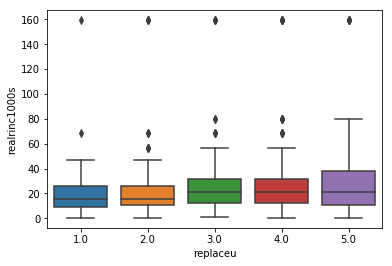

In [68]:
g['realrinc1000s'] = (g['realrinc'])/1000 ## turn income into 1000s of dollars for ease of interpretation

 ##  replaceu asked "How difficult or easy do you think it would be for your firm or organization 
## to replace you if you left?" with 1 being easily and 5 being very difficultly.


## Look at the plot of average income by how hard it would be to replace you.    
import seaborn as sns
sns.boxplot(x="replaceu", y="realrinc1000s",
                        data=g)

## 2. Add an additional variable that might mediate or partly "explain" the initial association from that simple regression above -- and explain your results.  Did it work out?  Yes?  No? 

## Perhaps people who make more money are just more confident, so I looked at big5d2, To what extent do you agree or disagree with the following statements? I see myself as someone who... d. Gets nervous easily" and the higher the score, the more confident people are

In [71]:
gg = g.dropna(subset = ["big5d2"]) ## We only include observations that also answer about their personality ##
    
lm_rep = smf.ols(formula = 'replaceu~realrinc1000s', data = gg).fit()
print (lm_rep.summary())

                            OLS Regression Results                            
Dep. Variable:               replaceu   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     27.41
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           2.09e-07
Time:                        00:46:04   Log-Likelihood:                -1412.7
No. Observations:                 835   AIC:                             2829.
Df Residuals:                     833   BIC:                             2839.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.6798      0.061     43.732

## For every 1000 dollars more, a person believes it is 0.008 points harder to find someone to replace them, on average

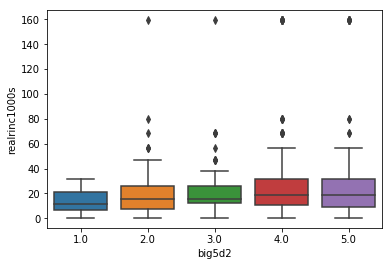

In [72]:
## You do see that more confident people have higher incomes.

sns.boxplot(x="big5d2", y="realrinc1000s",
                        data=gg)

In [73]:
lm_med = smf.ols(formula = 'replaceu~realrinc1000s+big5d2', data = gg).fit()
print (lm_med.summary())

                            OLS Regression Results                            
Dep. Variable:               replaceu   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     18.93
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           9.14e-09
Time:                        00:46:16   Log-Likelihood:                -1407.7
No. Observations:                 835   AIC:                             2821.
Df Residuals:                     832   BIC:                             2835.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.2214      0.156     14.211

## Net of how much money someone makes, for each category more confident they feel, they are .13 points higher on thinking they cannot be easily replaced
## But you will see that this second variable hardly changes the income variable, so it is not mediating the effect really

## Now, let's try a different dataset.  This is the World Values Survey.  Learn more about it here: http://www.worldvaluessurvey.org/WVSOnline.jsp  

## Or look here: http://www.thearda.com/Archive/Files/Codebooks/WVS2010_CB.asp

In [74]:
d = pd.read_csv("WVS.csv")
d.head()

,V1,V2,V2A,V3,V4,V5,V6,V7,V8,V9,...,V224_ESMA,V228_2,V243_AU,V244_AU,V248_CS,V253_CS,V256B,V256C,sacsecval,secvalwgt
0,6,12,12,1.0,1.0,1.0,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300476,1.0
1,6,12,12,2.0,1.0,2.0,3.0,4.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.301905,1.0
2,6,12,12,3.0,1.0,3.0,2.0,4.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.386071,1.0
3,6,12,12,4.0,1.0,1.0,3.0,4.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.344405,1.0
4,6,12,12,5.0,1.0,1.0,1.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.304167,1.0


## 3. Run another multiple regression.  Tell me how you expect your dependent variable to be affected by the independent variables.  Interpret your results.

## Here is a question about "Using this card, would you please indicate for each description whether that person is very much like you, like you, somewhat like you, not like you, or not at all like you? It is important to this person to have a good time; to 'spoil' oneself (V73)" with higher scores meaning less like me 

In [75]:
d.rename(columns={'V73':'spoil',
                          'V242':'age',
                          'V57':'marital',
                          'V240':'sex',
                          'V239':'ses'}, ## this asks where you place yourself in the income distribution in your country## 
                 inplace=True)

In [76]:
for col in d.columns: 
    print(col)

V1
V2
V2A
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
V29
V30
V31
V32
V33
V34
V35
V36
V37
V38
V39
V40
V41
V42
V43
V44
V45
V46
V47
V48
V49
V50
V51
V52
V53
V54
V55
V56
marital
V58
V59
V60
V61
V62
V63
V64
V65
V66
V67
V68
V69
V70
V71
V72
spoil
V74
V74B
V75
V76
V77
V78
V79
V80
V81
V82
V83
V84
V85
V86
V87
V88
V89
V90
V91
V92
V93
V94
V95
V96
V97
V98
V99
V100
V101
V102
V103
V104
V105
V106
V107
V108
V109
V110
V111
V112
V113
V114
V115
V116
V117
V118
V119
V120
V121
V122
V123
V124
V125_00
V125_01
V125_02
V125_03
V125_04
V125_05
V125_06
V125_07
V125_08
V125_09
V125_10
V125_11
V125_12
V125_13
V125_14
V125_15
V126
V127
V128
V129
V130
V131
V132
V133
V134
V135
V136
V137
V138
V139
V140
V141
V142
V143
V144
V145
V146
V147
V148
V149
V150
V151
V152
V153
V154
V155
V156
V157
V158
V159
V160
V161
V162
V163
V164
V165
V166
V167
V168
V169
V160A
V160B
V160C
V160D
V160E
V160F
V160G
V160H
V160I
V160J
V170
V171
V172
V173
V174
V175
V176
V177
V178
V179
V180
V181
V182


In [77]:
d['rspoil']=7-(d['spoil']) ## reverse code spoil yourself variable - higher variable means more spoiling ... ##

In [78]:
conditions = [
    (d['marital'] ==1) ,
     (d['marital'] >1 )]
choices = [1,0]
d['married'] = np.select(conditions, choices, default=np.nan)

In [79]:
conditions = [
    (d['sex'] ==2) ,
     (d['sex'] !=2 )]
choices = [1,0]
d['female'] = np.select(conditions, choices, default=np.nan)

## I am going to focus only on Australia, which is country code (V2) of 36.

In [80]:
dd = d.dropna(subset = ["ses"]) ## only keep observations that answered about their SES level ##

lm1 = smf.ols(formula = 'rspoil ~ age + female + married', data = dd, subset = (dd['V2']==36) ).fit()
print (lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                 rspoil   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     48.46
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           8.69e-30
Time:                        00:46:51   Log-Likelihood:                -2241.7
No. Observations:                1394   AIC:                             4491.
Df Residuals:                    1390   BIC:                             4512.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4533      0.119     37.353      0.0


## Here is a regression predicting if you want to spoil yourself as a function of age, sex, and marital status

## We did this for Australia and only if people also answered about ses


## Results show that these things matter, in predictable ways ... women, older people and married people do not think they tend to spoil themselves

## 4. Now add another independent variable to that model in Question 3, preferably a set of dummy variables.  Tell me why you added that new set of variables and what effect you expected them to have.  Did they have an effect?  Interpret that new model.  ##

## I think perhaps higher SES people will be more inclined to spoil themselves.

## The SES variable has 10 (ordered) categories, so let's break each category out separately.  See how we made dummies of ses_1 through ses_10

In [81]:
ddsub = pd.concat([dd.rspoil, dd.age, dd.female, dd.married, dd.V2,
                   pd.get_dummies(dd.ses.astype(int), prefix='ses')],  axis = 1 )
ddsub.columns

Index(['rspoil', 'age', 'female', 'married', 'V2', 'ses_1', 'ses_2', 'ses_3',
       'ses_4', 'ses_5', 'ses_6', 'ses_7', 'ses_8', 'ses_9', 'ses_10'],
      dtype='object')

## Put those SES dummies in the model

In [82]:
lm2 = smf.ols(formula = 'rspoil ~ age + female + married + ses_2 + ses_3 + ses_4 + ses_5 + ses_6 + ses_7 + ses_8 + ses_9 + ses_10', data = ddsub, subset = (ddsub['V2']==36) ).fit()
print (lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                 rspoil   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     13.20
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           4.47e-26
Time:                        00:47:12   Log-Likelihood:                -2235.4
No. Observations:                1394   AIC:                             4497.
Df Residuals:                    1381   BIC:                             4565.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3011      0.180     23.893      0.0

## In general, as the SES categories go higher, the higher the score on spoiling themselves (with Bs of +0.06 to +0.41), but not in every case and not really statistically significantly on their own.  

## THIS IS JUST EXTRA CODE for you to HAVE.  YOU DO NOT NEED TO DO ANY OF THIS CODE BELOW!  IT IS JUST HERE FOR REFERENCE.  Now run a partial F test comparing the model in Question 3 to the model in Question 4.  Does the F test support the idea of adding those new variables?  Why?  Why not? ##

In [83]:
sm.stats.anova_lm(lm1, lm2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1390.0,2035.083779,0.0,NaN,NaN,NaN
1,1381.0,2016.608775,9.0,18.475004,1.405769,0.180263


## Did adding SES categories improve the fit of the model?  Was it a good idea?  With a p=0.18, we would not conclude that SES is a significant predictor of whether Austrailians think they should spoil themselves.

## BTW, another way to do this, but NOT recommended.  Just included for you to see.

In [84]:
## 4. Now add another independent variable to that model in Question 3, preferably a set of dummy variables.  Tell me why you added that new set of variables and what effect you expected them to have.  Did they have an effect?  Interpret that new model.  ##

lm3 = smf.ols(formula = 'rspoil ~ age + female + married + ses', data = dd, subset = (dd['V2']==36) ).fit()
print (lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                 rspoil   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     37.48
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           8.42e-30
Time:                        00:47:28   Log-Likelihood:                -2239.6
No. Observations:                1394   AIC:                             4489.
Df Residuals:                    1389   BIC:                             4515.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2382      0.159     26.682      0.0

In [85]:
## We have added in ses, and Now run a partial F test comparing the model in Question 3 to the model in Question 4.  Does the F test support the idea of adding those new variables?  Why?  Why not? ##

sm.stats.anova_lm(lm1, lm3)
    
## Hopefully, you recognize that the partial F is just the square of the t-statistic on ses



,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1390.0,2035.083779,0.0,NaN,NaN,NaN
1,1389.0,2028.971909,1.0,6.11187,4.184083,0.040993
